# Build a Linear Regression Model to predict life expectancy based on various factors

# The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

In [164]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score


In [165]:
# Load Dataset
LE_BMI_data = pd.read_csv('data/bmi_and_life_expectancy.csv')
LE_Year_data = pd.read_csv('data/Life_Expectancy_Data_by_Year.csv')
LE_BMI_data.head()

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083


<Figure size 864x576 with 0 Axes>

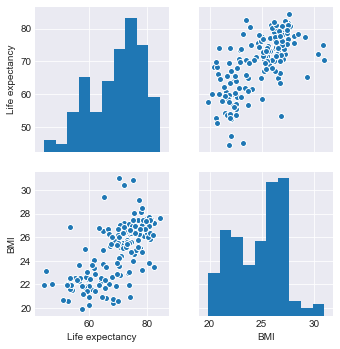

In [166]:
fig= plt.figure(figsize=(12,8))
sns.pairplot(LE_BMI_data,dropna=True)

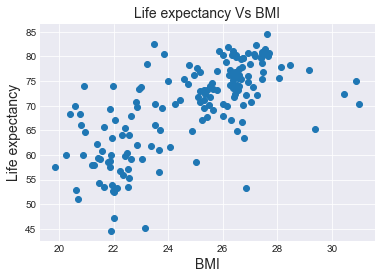

In [167]:
plt.scatter(LE_BMI_data['BMI'], LE_BMI_data['Life expectancy'])
plt.title('Life expectancy Vs BMI', fontsize=14)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Life expectancy', fontsize=14)
plt.grid(True)
plt.show()
 


In [168]:
# Create a linear regression model based on BMI
X_BMI = LE_BMI_data[['BMI']]
y_BMI = LE_BMI_data[['Life expectancy']]
BMI_model = LinearRegression()
BMI_model.fit(X_BMI,y_BMI)
print('Weight coefficients: ', BMI_model.coef_)
print('y-axis intercept: ', BMI_model.intercept_) 


Weight coefficients:  [[2.51847944]]
y-axis intercept:  [7.22783834]


<function matplotlib.pyplot.show(*args, **kw)>

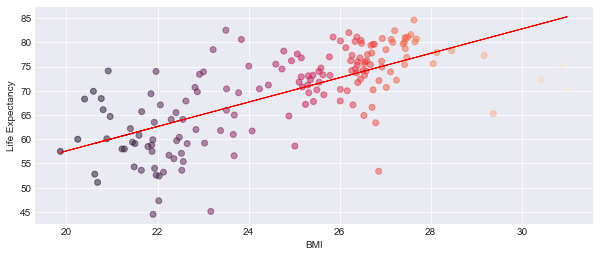

In [169]:
# Predict the Data and plot a scatter chart
sns.set_style("darkgrid",)
fig= plt.figure(figsize=(10,4),edgecolor='black')
plt.scatter(X_BMI.values,y_BMI.values,alpha = 0.5 , c=X_BMI.values,)
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.plot(X_BMI,BMI_model.predict(X_BMI), color='red',linewidth=1)
plt.savefig('BMI_LifeExpect.png',facecolor=fig.get_facecolor(), transparent=True)
plt.show


In [170]:

LE_Year_data.rename(columns={'Life expectancy (Clio-Infra up to 1949; UN Population Division for 1950 to 2015)':'Life Expectancy'}, inplace = True)

LE_Year_data_usa = LE_Year_data.loc[LE_Year_data['Code'] == 'USA']
LE_Year_data_usa.head()

,Entity,Code,Year,Life Expectancy
16777,United States,USA,1880,39.410000
16778,United States,USA,1890,45.209999
16779,United States,USA,1901,49.299999
16780,United States,USA,1902,50.500000
16781,United States,USA,1903,50.599998


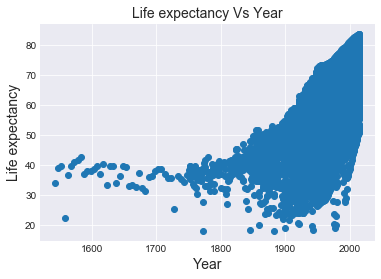

In [171]:
plt.scatter(LE_Year_data['Year'], LE_Year_data['Life Expectancy'])
plt.title('Life expectancy Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Life expectancy', fontsize=14)
plt.grid(True)
plt.show()

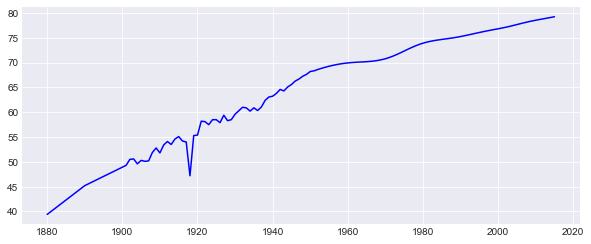

In [172]:
sns.set_style("darkgrid")
X = LE_Year_data_usa[['Year']]
y = LE_Year_data_usa[['Life Expectancy']]
fig = plt.figure(figsize=(10,4),edgecolor='black')
plt.plot(X,y,c='blue')

In [173]:
# Create a lineear regresion model based on Year
Year_model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
Year_model.fit(X_train, y_train)
print('Weight coefficients: ', Year_model.coef_)
print('y-axis intercept: ', Year_model.intercept_) 
year_based_prediction = Year_model.predict(X_test)


Weight coefficients:  [[0.26924786]]
y-axis intercept:  [-460.24206844]


In [174]:
# Calculate MSE and R2 value
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, year_based_prediction)
R2 = r2_score(y_test,year_based_prediction)
print("Mean Squared Error : " + str(mse))
print("R2 Score: " + str(R2))

Mean Squared Error : 3.749365897965322
R2 Score: 0.9631395302389767


In [175]:
full_data = pd.read_csv('data/Life Expectancy Data.csv')
full_data_usa = full_data.loc[full_data['Country'] == 'United States of America']
prediction_data_usa = full_data_usa[['Year','Life expectancy ','Adult Mortality',' BMI ']]
prediction_data_usa.head()

,Year,Life expectancy,Adult Mortality,BMI
2794,2015,79.3,13.0,69.6
2795,2014,79.1,14.0,69.1
2796,2013,78.9,16.0,68.6
2797,2012,78.8,16.0,68.0
2798,2011,78.7,16.0,67.5


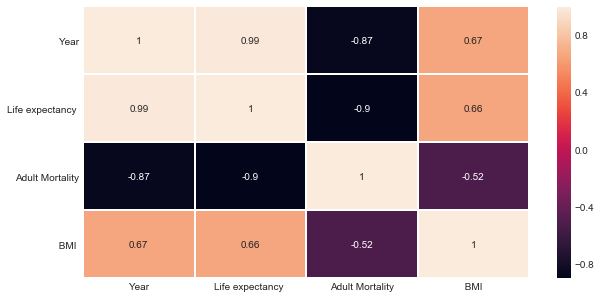

In [176]:
#Correlation Plot to see any major indicators that effect life expectancy
plt.figure(figsize=(10,5))
sns.heatmap(prediction_data_usa.corr(),annot=True,linewidths=1.0)

In [177]:
#Build a multi rgression model based on year, adult mortality and bmi

X_pred = prediction_data_usa[['Year','Adult Mortality',' BMI ']]
y_pred = prediction_data_usa['Life expectancy ']
X_train, X_test, y_train, y_test = train_test_split(X_pred, y_pred, test_size= 0.4,random_state=5)
model = LinearRegression()
model.fit(X_train, y_train)
predictions= model.predict(X_test)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [ 0.15414818 -0.00246276  0.00038248]
y-axis intercept:  -231.2707468028169


In [178]:

# Calculate MSE and R2 value
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
R2 = r2_score(y_test,predictions)
print("Mean Squared Error : " + str(mse))
print("R2 Score: " + str(R2))


Mean Squared Error : 0.008272039203786207
R2 Score: 0.9868994854238681


# Multi Linear Regression Model

# Life Expectancy = -231.28 + 0.15*(Year) -0.0024*(Adult Mortality) + 0.0039(BMI)